In [5]:
import torch
import os
import matplotlib.pyplot as plt
from utils.data_loader import get_dataloaders
from models.dense_baseline import get_baseline
from models.moe_model import MoEModel
from utils.visualization import HistoryLogger, plot_learning_curves, plot_expert_utilization, compare_params_vs_performance, plot_expert_heatmap
from train import train_baseline, train_moe

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [6]:
# Load Data
# Using a reduced batch size if running on CPU, defaults to 128
batch_size = 64
train_loader, val_loader, test_loader, num_classes, img_size = get_dataloaders(batch_size=batch_size)

print(f"Num Classes: {num_classes}, Image Size: {img_size}")

Loaded CIFAR-100: 45000 train, 5000 val, 10000 test images.
Num Classes: 100, Image Size: (3, 32, 32)


In [7]:
# Configuration for the test run
epochs = 10
save_dir = './test_results'
os.makedirs(save_dir, exist_ok=True)

# 1. Train MoE Model (Top-1)
print("=== Training MoE Model (Top-1) ===")
moe_model_top1 = MoEModel(num_experts=4, num_classes=num_classes, input_channels=img_size[0], top_k=1).to(device)
moe_top1_save_path = os.path.join(save_dir, 'moe_model_top1.pth')

train_moe(moe_model_top1, train_loader, val_loader, test_loader, epochs, device, moe_top1_save_path, aux_weight=5.0)

=== Training MoE Model (Top-1) ===
Starting MoE training on cuda with aux_weight=5.0, Top-K=1


Epoch 1/10: 100%|██████████| 704/704 [00:05<00:00, 135.45it/s, loss=5.02, acc=6.65]


Epoch 1: Train: 6.65% | Val: 9.86% | Test: 10.79%
   Usage: [E0:0.2% | E1:0.1% | E2:99.5% | E3:0.2%]


Epoch 2/10: 100%|██████████| 704/704 [00:05<00:00, 126.65it/s, loss=4.66, acc=10.7]


Epoch 2: Train: 10.70% | Val: 7.84% | Test: 9.34%
   Usage: [E0:3.9% | E1:3.0% | E2:91.2% | E3:1.9%]


Epoch 3/10: 100%|██████████| 704/704 [00:07<00:00, 91.49it/s, loss=3.95, acc=10.4] 


Epoch 3: Train: 10.44% | Val: 12.76% | Test: 15.43%
   Usage: [E0:22.4% | E1:22.2% | E2:35.5% | E3:19.9%]


Epoch 4/10: 100%|██████████| 704/704 [00:08<00:00, 87.71it/s, loss=3.74, acc=13.5]


Epoch 4: Train: 13.45% | Val: 14.62% | Test: 16.08%
   Usage: [E0:20.0% | E1:23.2% | E2:35.5% | E3:21.2%]


Epoch 5/10: 100%|██████████| 704/704 [00:07<00:00, 89.29it/s, loss=3.57, acc=16.2]


Epoch 5: Train: 16.19% | Val: 17.78% | Test: 19.87%
   Usage: [E0:19.6% | E1:27.1% | E2:36.4% | E3:16.9%]


Epoch 6/10: 100%|██████████| 704/704 [00:08<00:00, 84.10it/s, loss=3.42, acc=18.4]


Epoch 6: Train: 18.39% | Val: 18.96% | Test: 22.45%
   Usage: [E0:12.8% | E1:33.7% | E2:32.8% | E3:20.7%]


Epoch 7/10: 100%|██████████| 704/704 [00:08<00:00, 79.46it/s, loss=3.25, acc=21.4]


Epoch 7: Train: 21.41% | Val: 21.34% | Test: 23.84%
   Usage: [E0:13.3% | E1:31.5% | E2:30.9% | E3:24.3%]


Epoch 8/10: 100%|██████████| 704/704 [00:08<00:00, 80.89it/s, loss=3.08, acc=24.7]


Epoch 8: Train: 24.71% | Val: 25.48% | Test: 28.30%
   Usage: [E0:12.3% | E1:31.4% | E2:30.4% | E3:25.9%]


Epoch 9/10: 100%|██████████| 704/704 [00:08<00:00, 80.63it/s, loss=2.92, acc=27.9]


Epoch 9: Train: 27.90% | Val: 27.94% | Test: 31.27%
   Usage: [E0:13.1% | E1:31.7% | E2:29.6% | E3:25.6%]


Epoch 10/10: 100%|██████████| 704/704 [00:08<00:00, 80.29it/s, loss=2.79, acc=30.9]


Epoch 10: Train: 30.87% | Val: 29.96% | Test: 32.98%
   Usage: [E0:13.1% | E1:30.3% | E2:29.7% | E3:27.0%]
MoE Training finished. Final Test Accuracy: 32.98%


In [8]:
# 1b. Train MoE Model (Top-2)
print("=== Training MoE Model (Top-2) ===")
moe_model_top2 = MoEModel(num_experts=4, num_classes=num_classes, input_channels=img_size[0], top_k=2).to(device)
moe_top2_save_path = os.path.join(save_dir, 'moe_model_top2.pth')

train_moe(moe_model_top2, train_loader, val_loader, test_loader, epochs, device, moe_top2_save_path, aux_weight=5.0)

=== Training MoE Model (Top-2) ===
Starting MoE training on cuda with aux_weight=5.0, Top-K=2


Epoch 1/10: 100%|██████████| 704/704 [00:08<00:00, 84.99it/s, loss=4.99, acc=7.33] 


Epoch 1: Train: 7.33% | Val: 8.76% | Test: 8.33%
   Usage: [E0:49.8% | E1:3.3% | E2:41.0% | E3:5.9%]


Epoch 2/10: 100%|██████████| 704/704 [00:07<00:00, 97.76it/s, loss=4.67, acc=12.2] 


Epoch 2: Train: 12.23% | Val: 14.04% | Test: 16.04%
   Usage: [E0:50.0% | E1:0.0% | E2:43.9% | E3:6.1%]


Epoch 3/10: 100%|██████████| 704/704 [00:08<00:00, 83.06it/s, loss=4.1, acc=13]    


Epoch 3: Train: 13.04% | Val: 14.52% | Test: 15.73%
   Usage: [E0:31.2% | E1:13.6% | E2:34.2% | E3:21.0%]


Epoch 4/10: 100%|██████████| 704/704 [00:08<00:00, 81.11it/s, loss=3.54, acc=16.5]


Epoch 4: Train: 16.49% | Val: 18.04% | Test: 21.58%
   Usage: [E0:20.1% | E1:23.7% | E2:26.7% | E3:29.5%]


Epoch 5/10: 100%|██████████| 704/704 [00:08<00:00, 81.37it/s, loss=3.25, acc=21.2]


Epoch 5: Train: 21.21% | Val: 18.36% | Test: 20.50%
   Usage: [E0:20.6% | E1:28.9% | E2:19.5% | E3:31.0%]


Epoch 6/10: 100%|██████████| 704/704 [00:08<00:00, 81.81it/s, loss=3.11, acc=23.5]


Epoch 6: Train: 23.46% | Val: 25.20% | Test: 28.47%
   Usage: [E0:23.5% | E1:29.2% | E2:17.2% | E3:30.2%]


Epoch 7/10: 100%|██████████| 704/704 [00:08<00:00, 80.26it/s, loss=2.84, acc=28.9]


Epoch 7: Train: 28.88% | Val: 28.68% | Test: 30.98%
   Usage: [E0:21.7% | E1:29.6% | E2:18.8% | E3:29.9%]


Epoch 8/10: 100%|██████████| 704/704 [00:08<00:00, 80.69it/s, loss=2.66, acc=32.6]


Epoch 8: Train: 32.63% | Val: 32.04% | Test: 34.54%
   Usage: [E0:22.0% | E1:28.6% | E2:20.2% | E3:29.2%]


Epoch 9/10: 100%|██████████| 704/704 [00:08<00:00, 79.11it/s, loss=2.49, acc=36.6]


Epoch 9: Train: 36.62% | Val: 35.36% | Test: 37.42%
   Usage: [E0:22.2% | E1:28.3% | E2:21.2% | E3:28.3%]


Epoch 10/10: 100%|██████████| 704/704 [00:08<00:00, 79.99it/s, loss=2.37, acc=39.4]


Epoch 10: Train: 39.36% | Val: 37.14% | Test: 40.62%
   Usage: [E0:22.4% | E1:28.1% | E2:21.5% | E3:28.0%]
MoE Training finished. Final Test Accuracy: 40.62%


In [9]:
# 2. Train Baseline (Width x1.0)
print("\n=== Training Baseline (Width x1.0) ===")
baseline_w1 = get_baseline(input_shape=img_size, num_classes=num_classes, width_multiplier=1.0).to(device)
baseline_w1_save_path = os.path.join(save_dir, 'baseline_w1.0.pth')

train_baseline(baseline_w1, train_loader, val_loader, test_loader, epochs, device, baseline_w1_save_path)


=== Training Baseline (Width x1.0) ===
Starting Dense Baseline training on cuda...


Epoch 1/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 127.51it/s, loss=4.07, acc=6.98]


Epoch 1: Train Acc: 6.98%, Val Acc: 11.14%, Val Loss: 3.7649, Test Acc: 12.80%


Epoch 2/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 128.82it/s, loss=3.77, acc=11.5]


Epoch 2: Train Acc: 11.50%, Val Acc: 10.50%, Val Loss: 3.8275, Test Acc: 11.99%


Epoch 3/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 127.27it/s, loss=3.63, acc=14]  


Epoch 3: Train Acc: 14.02%, Val Acc: 13.92%, Val Loss: 3.6741, Test Acc: 15.22%


Epoch 4/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 131.05it/s, loss=3.45, acc=17.2]


Epoch 4: Train Acc: 17.21%, Val Acc: 17.02%, Val Loss: 3.4901, Test Acc: 19.55%


Epoch 5/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 117.45it/s, loss=3.29, acc=20.2]


Epoch 5: Train Acc: 20.16%, Val Acc: 20.46%, Val Loss: 3.2854, Test Acc: 24.13%


Epoch 6/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 129.84it/s, loss=3.14, acc=23]  


Epoch 6: Train Acc: 23.04%, Val Acc: 24.22%, Val Loss: 3.0617, Test Acc: 27.87%


Epoch 7/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 129.15it/s, loss=2.97, acc=26.1]


Epoch 7: Train Acc: 26.06%, Val Acc: 25.74%, Val Loss: 3.0359, Test Acc: 29.33%


Epoch 8/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 129.02it/s, loss=2.81, acc=29.3]


Epoch 8: Train Acc: 29.25%, Val Acc: 29.20%, Val Loss: 2.8307, Test Acc: 31.92%


Epoch 9/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 131.19it/s, loss=2.63, acc=33.1]


Epoch 9: Train Acc: 33.13%, Val Acc: 32.66%, Val Loss: 2.6697, Test Acc: 36.28%


Epoch 10/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 129.96it/s, loss=2.51, acc=35.9]


Epoch 10: Train Acc: 35.87%, Val Acc: 33.94%, Val Loss: 2.5885, Test Acc: 37.48%
Training finished. Final Test Accuracy: 37.48%


In [10]:
# 3. Train Baseline (Width x2.0)
print("\n=== Training Baseline (Width x2.0) ===")
baseline_w2 = get_baseline(input_shape=img_size, num_classes=num_classes, width_multiplier=2.0).to(device)
baseline_w2_save_path = os.path.join(save_dir, 'baseline_w2.0.pth')

train_baseline(baseline_w2, train_loader, val_loader, test_loader, epochs, device, baseline_w2_save_path)


=== Training Baseline (Width x2.0) ===
Starting Dense Baseline training on cuda...


Epoch 1/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 133.82it/s, loss=4.28, acc=4.58]


Epoch 1: Train Acc: 4.58%, Val Acc: 9.46%, Val Loss: 3.9041, Test Acc: 10.01%


Epoch 2/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 124.77it/s, loss=3.83, acc=11]  


Epoch 2: Train Acc: 11.01%, Val Acc: 10.82%, Val Loss: 3.8252, Test Acc: 12.04%


Epoch 3/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 128.81it/s, loss=3.62, acc=14]  


Epoch 3: Train Acc: 14.02%, Val Acc: 13.88%, Val Loss: 3.6012, Test Acc: 16.04%


Epoch 4/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 129.06it/s, loss=3.4, acc=18.4] 


Epoch 4: Train Acc: 18.36%, Val Acc: 19.60%, Val Loss: 3.3669, Test Acc: 22.10%


Epoch 5/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 127.87it/s, loss=3.21, acc=21.6]


Epoch 5: Train Acc: 21.65%, Val Acc: 24.88%, Val Loss: 3.0909, Test Acc: 27.51%


Epoch 6/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 124.99it/s, loss=3.03, acc=25.2]


Epoch 6: Train Acc: 25.22%, Val Acc: 25.38%, Val Loss: 3.0268, Test Acc: 28.01%


Epoch 7/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 130.33it/s, loss=2.83, acc=28.9]


Epoch 7: Train Acc: 28.94%, Val Acc: 29.70%, Val Loss: 2.8352, Test Acc: 32.81%


Epoch 8/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 129.15it/s, loss=2.63, acc=32.8]


Epoch 8: Train Acc: 32.81%, Val Acc: 32.48%, Val Loss: 2.6660, Test Acc: 35.90%


Epoch 9/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 127.32it/s, loss=2.45, acc=37]  


Epoch 9: Train Acc: 36.96%, Val Acc: 36.06%, Val Loss: 2.5011, Test Acc: 39.57%


Epoch 10/10 [Train]: 100%|██████████| 704/704 [00:05<00:00, 129.05it/s, loss=2.32, acc=39.8]


Epoch 10: Train Acc: 39.82%, Val Acc: 38.34%, Val Loss: 2.4049, Test Acc: 41.27%
Training finished. Final Test Accuracy: 41.27%


In [11]:
# Load Histories
moe_top1_hist_path = moe_top1_save_path.replace('.pth', '_history.json')
moe_top2_hist_path = moe_top2_save_path.replace('.pth', '_history.json')
base_w1_hist_path = baseline_w1_save_path.replace('.pth', '_history.json')
base_w2_hist_path = baseline_w2_save_path.replace('.pth', '_history.json')

history_moe_top1 = HistoryLogger.load(moe_top1_hist_path).history
history_moe_top2 = HistoryLogger.load(moe_top2_hist_path).history
history_base_w1 = HistoryLogger.load(base_w1_hist_path).history
history_base_w2 = HistoryLogger.load(base_w2_hist_path).history

print("Histories loaded.")

Histories loaded.


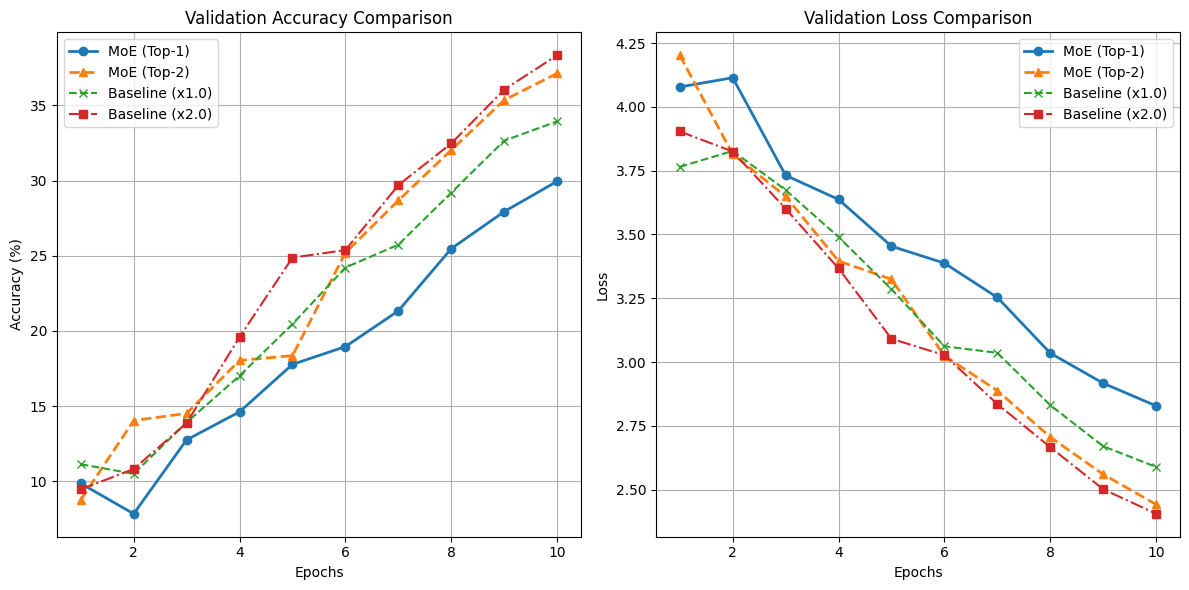

In [12]:
# Visualization: 4-Way Comparison
epochs_range = range(1, len(history_moe_top1['train_acc']) + 1)

plt.figure(figsize=(12, 6))

# Plot Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_moe_top1['val_acc'], label='MoE (Top-1)', linewidth=2, marker='o')
plt.plot(epochs_range, history_moe_top2['val_acc'], label='MoE (Top-2)', linewidth=2, marker='^', linestyle='--')
plt.plot(epochs_range, history_base_w1['val_acc'], label='Baseline (x1.0)', linestyle='--', marker='x')
plt.plot(epochs_range, history_base_w2['val_acc'], label='Baseline (x2.0)', linestyle='-.', marker='s')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_moe_top1['val_loss'], label='MoE (Top-1)', linewidth=2, marker='o')
plt.plot(epochs_range, history_moe_top2['val_loss'], label='MoE (Top-2)', linewidth=2, marker='^', linestyle='--')
plt.plot(epochs_range, history_base_w1['val_loss'], label='Baseline (x1.0)', linestyle='--', marker='x')
plt.plot(epochs_range, history_base_w2['val_loss'], label='Baseline (x2.0)', linestyle='-.', marker='s')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Expert Utilization Plot (Top-1):


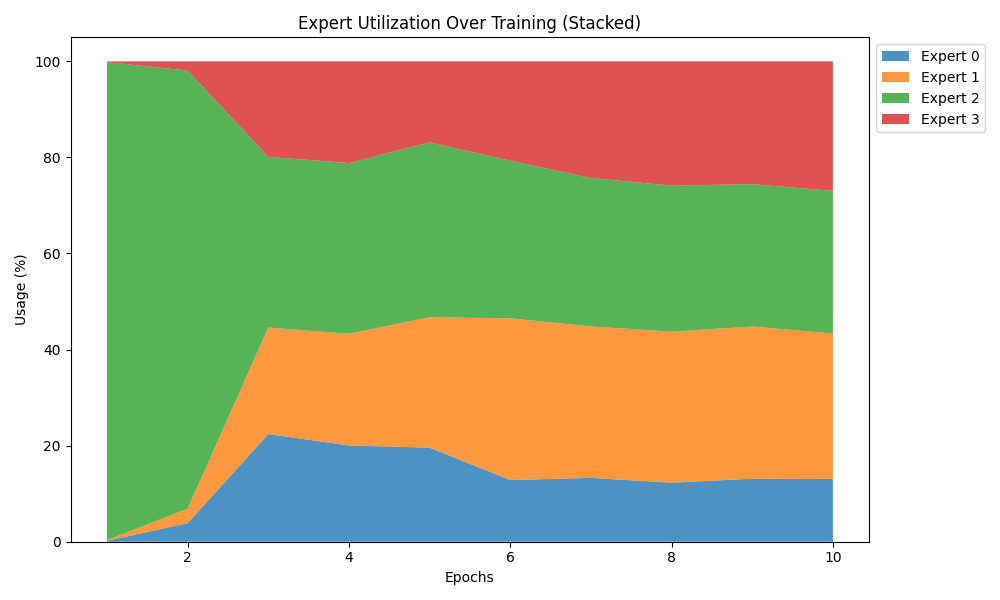

In [13]:
# Visualization: Expert Utilization (Top-1 Model)
from IPython.display import Image, display

# Call the library function
plot_expert_utilization(HistoryLogger.load(moe_top1_hist_path), save_dir)

# Display the saved image
print("Expert Utilization Plot (Top-1):")
display(Image(filename=os.path.join(save_dir, 'expert_utilization_evolution.png')))

Expert Utilization Plot (Top-2):


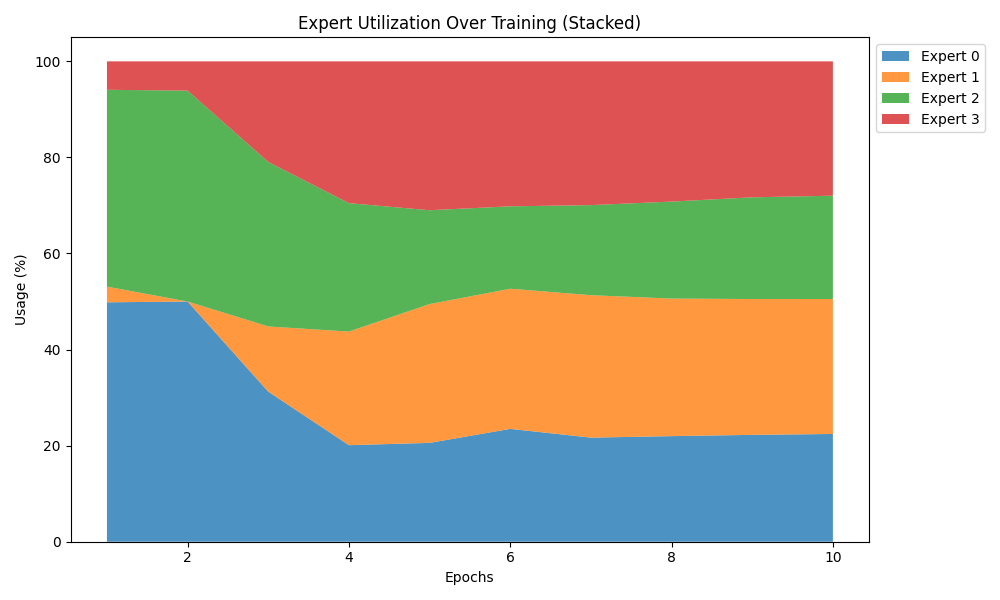

In [14]:
# Visualization: Expert Utilization (Top-2 Model)
from IPython.display import Image, display

# Call the library function
plot_expert_utilization(HistoryLogger.load(moe_top2_hist_path), save_dir)

# Display the saved image
print("Expert Utilization Plot (Top-2):")
display(Image(filename=os.path.join(save_dir, 'expert_utilization_evolution.png')))

=== Plot 1: Accuracy vs Total Parameters (Storage Cost) ===
Conclusion: MoE requires more memory (Storage), Top-2 same as Top-1.


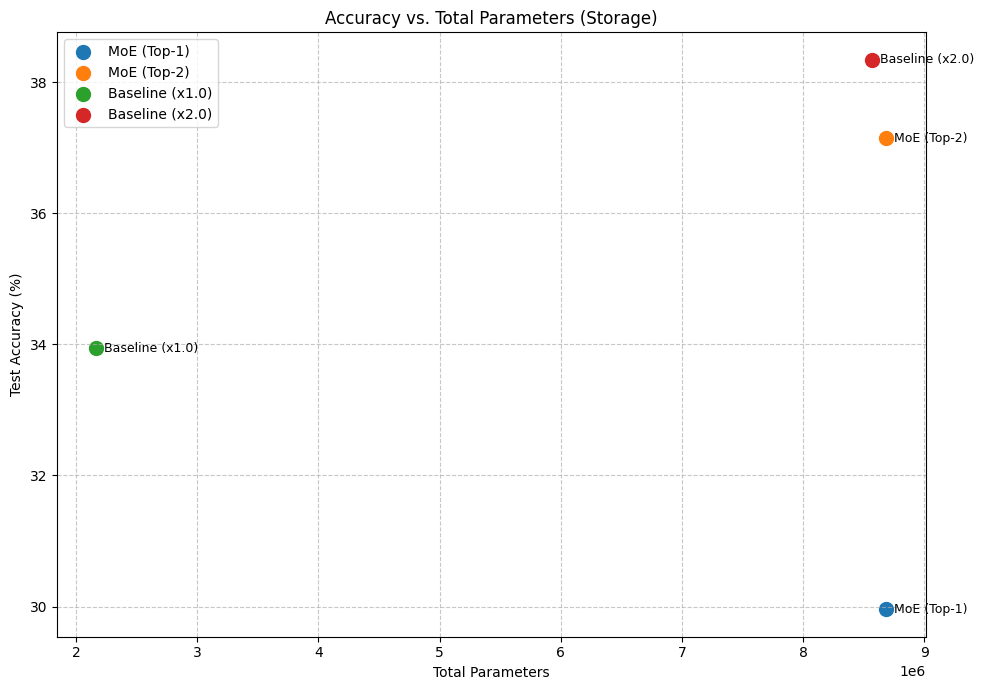


=== Plot 2: Accuracy vs Active Parameters (Inference Cost) ===
Conclusion: MoE is strictly more efficient. Top-2 costs 2x expert compute of Top-1.


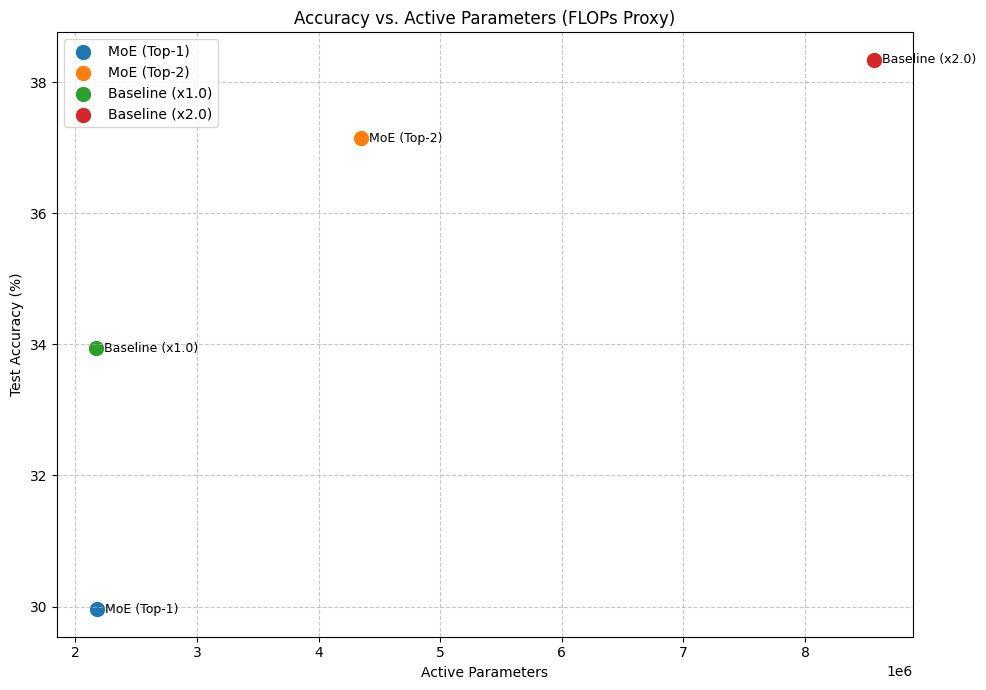

In [15]:
# Visualization: Parameters vs Performance (Storage vs Compute)

def count_total_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def count_active_params_moe(model):
    # Active = Router + k * Expert
    router_params = sum(p.numel() for p in model.router.parameters())
    # Assuming all experts are identical, multiplied by k active experts
    expert_params = sum(p.numel() for p in model.experts[0].parameters())
    return router_params + (expert_params * model.top_k)

def plot_scatter(data, title, xlabel, save_name):
    plt.figure(figsize=(10, 7))
    for m in data:
        plt.scatter(m['params'], m['accuracy'], s=100, label=m['name'])
        # Add a small offset to text so it doesn't overlap the dot
        plt.text(m['params'], m['accuracy'], f"  {m['name']}", fontsize=9, va='center')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Test Accuracy (%)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, save_name))
    plt.show()

# 1. Prepare Data for Storage (Total Parameters)
# Shows memory footprint
storage_data = [
    {
        'name': 'MoE (Top-1)',
        'params': count_total_params(moe_model_top1),
        'accuracy': history_moe_top1['val_acc'][-1]
    },
    {
        'name': 'MoE (Top-2)',
        'params': count_total_params(moe_model_top2),
        'accuracy': history_moe_top2['val_acc'][-1]
    },
    {
        'name': 'Baseline (x1.0)',
        'params': count_total_params(baseline_w1),
        'accuracy': history_base_w1['val_acc'][-1]
    },
    {
        'name': 'Baseline (x2.0)',
        'params': count_total_params(baseline_w2),
        'accuracy': history_base_w2['val_acc'][-1]
    }
]

# 2. Prepare Data for Compute (Active Parameters)
# Shows computational efficiency (FLOPs proxy)
compute_data = [
    {
        'name': 'MoE (Top-1)',
        'params': count_active_params_moe(moe_model_top1), # Router + 1 Expert
        'accuracy': history_moe_top1['val_acc'][-1]
    },
    {
        'name': 'MoE (Top-2)',
        'params': count_active_params_moe(moe_model_top2), # Router + 2 Experts
        'accuracy': history_moe_top2['val_acc'][-1]
    },
    {
        'name': 'Baseline (x1.0)',
        'params': count_total_params(baseline_w1), # Dense runs everything
        'accuracy': history_base_w1['val_acc'][-1]
    },
    {
        'name': 'Baseline (x2.0)',
        'params': count_total_params(baseline_w2), # Dense runs everything
        'accuracy': history_base_w2['val_acc'][-1]
    }
]

print("=== Plot 1: Accuracy vs Total Parameters (Storage Cost) ===")
print("Conclusion: MoE requires more memory (Storage), Top-2 same as Top-1.")
plot_scatter(storage_data, 'Accuracy vs. Total Parameters (Storage)', 'Total Parameters', 'acc_vs_storage.png')

print("\n=== Plot 2: Accuracy vs Active Parameters (Inference Cost) ===")
print("Conclusion: MoE is strictly more efficient. Top-2 costs 2x expert compute of Top-1.")
plot_scatter(compute_data, 'Accuracy vs. Active Parameters (FLOPs Proxy)', 'Active Parameters', 'acc_vs_compute.png')